# Unphysical trajectories and numerical instabilities - Brusselator case

In [1]:
using MomentClosure, Catalyst, OrdinaryDiffEq, Plots

rn = @reaction_network begin
  (c₁/Ω^2), 2X + Y → 3X
  (c₂), X → Y
  (c₃*Ω, c₄), 0 ↔ X
end c₁ c₂ c₃ c₄ Ω

p = [0.9, 2, 1, 1, 100]
u₀ = [1, 1]
tspan = (0., 100.)

raw_eqs = generate_raw_moment_eqs(rn, 2, combinatoric_ratelaw=false)

MomentClosure.RawMomentEquations(Model ##ODESystem#295 with 5 equations
States (9):
  μ₁₀(t)
  μ₀₁(t)
  μ₂₀(t)
  μ₁₁(t)
  μ₀₂(t)
  μ₂₁(t)
⋮
Parameters (5):
  c₁
  c₂
  c₃
  c₄
  Ω, Dict{Any,Any}((0, 0) => 1,(3, 0) => μ₃₀(t),(2, 2) => μ₂₂(t),(2, 1) => μ₂₁(t),(1, 0) => μ₁₀(t),(3, 1) => μ₃₁(t),(2, 0) => μ₂₀(t),(0, 1) => μ₀₁(t),(1, 3) => μ₁₃(t),(4, 0) => μ₄₀(t)…), 2, 2, 4, [(0, 0), (1, 0), (0, 1), (2, 0), (1, 1), (0, 2), (3, 0), (2, 1), (1, 2), (0, 3), (4, 0), (3, 1), (2, 2), (1, 3), (0, 4)], [(2, 0), (1, 1), (0, 2)], [(3, 0), (2, 1), (1, 2), (0, 3), (4, 0), (3, 1), (2, 2), (1, 3), (0, 4)], [(1, 0), (0, 1)])

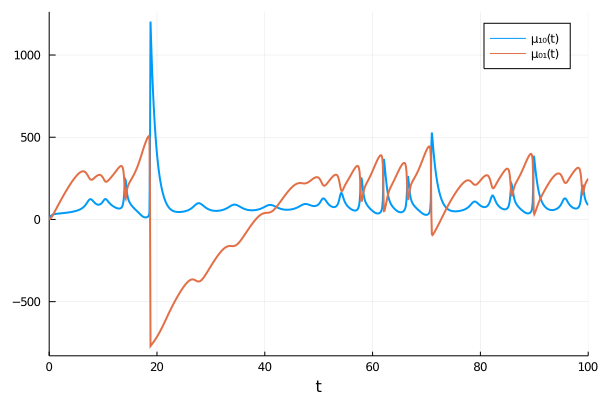

In [2]:
closed_raw_eqs = moment_closure(raw_eqs, "zero")

u₀map = deterministic_IC(u₀, closed_raw_eqs)
oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, p)
sol = solve(oprob, Tsit5(), saveat=0.1)

plot(sol, vars=(0, [1,2]), lw=2)

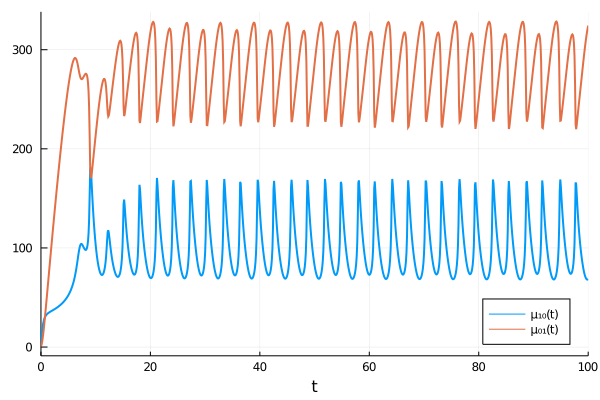

In [3]:
closed_raw_eqs = moment_closure(raw_eqs, "log-normal")

u₀map = deterministic_IC(u₀, closed_raw_eqs)
oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, p)
sol = solve(oprob, Tsit5(), saveat=0.1)

plot(sol, vars=(0, [1,2]), lw=2, legend=:bottomright)

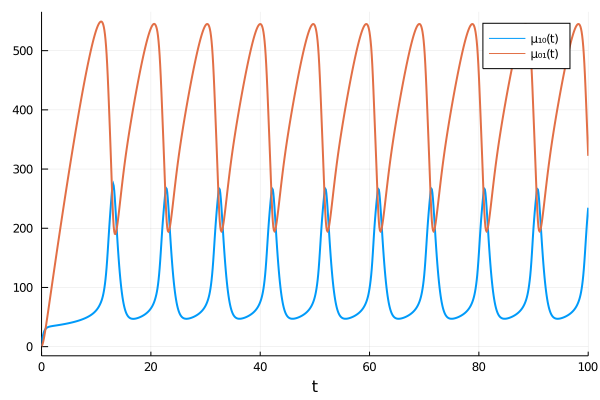

In [4]:
# Note the inclusion of combinatorial scaling terms in the propensity functions
raw_eqs = generate_raw_moment_eqs(rn, 2, combinatoric_ratelaw=true)
closed_raw_eqs = moment_closure(raw_eqs, "normal")

u₀map = deterministic_IC(u₀, closed_raw_eqs)
oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, p)
sol = solve(oprob, Tsit5(), saveat=0.1)

plot(sol, vars=(0, [1,2]), lw=2)

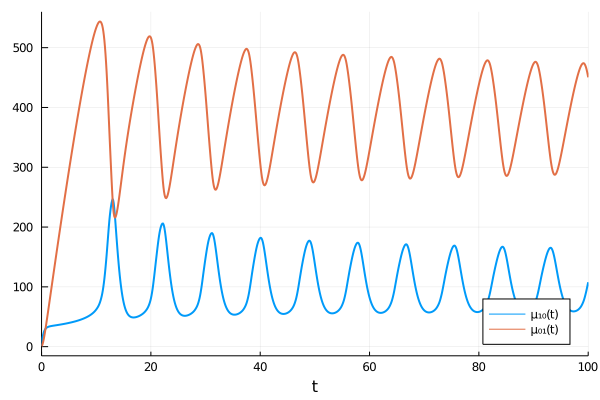

In [5]:
raw_eqs = generate_raw_moment_eqs(rn, 3, combinatoric_ratelaw=true)
closed_raw_eqs = moment_closure(raw_eqs, "normal")

u₀map = deterministic_IC(u₀, closed_raw_eqs)
oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, p)
sol = solve(oprob, Tsit5(), saveat=0.1)

plot(sol, vars=(0, [1,2]), lw=2, legend=:bottomright)

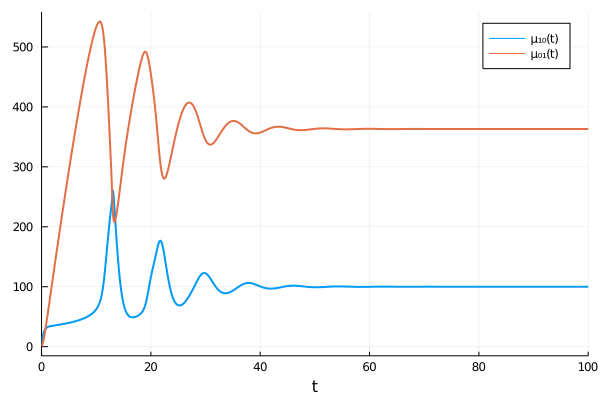

In [6]:
raw_eqs = generate_raw_moment_eqs(rn, 4, combinatoric_ratelaw=true)
closed_raw_eqs = moment_closure(raw_eqs, "normal")

u₀map = deterministic_IC(u₀, closed_raw_eqs)
oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, p)
sol = solve(oprob, Tsit5(), saveat=0.1)

plot(sol, vars=(0, [1,2]), lw=2)

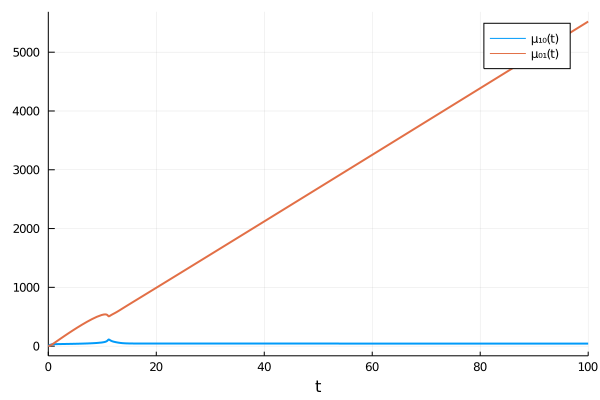

In [7]:
raw_eqs = generate_raw_moment_eqs(rn, 2, combinatoric_ratelaw=true)
closed_raw_eqs = moment_closure(raw_eqs, "log-normal")

u₀map = deterministic_IC(u₀, closed_raw_eqs)
oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, p)
sol = solve(oprob, Rodas4P(), saveat=0.1)

plot(sol, vars=(0, [1,2]), lw=2)

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase C:\Users\asukys\.julia\packages\SciMLBase\Afx1r\src\integrator_interface.jl:331


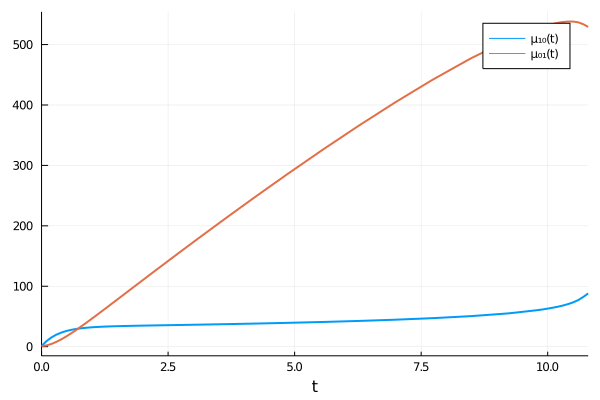

In [8]:
raw_eqs = generate_raw_moment_eqs(rn, 3, combinatoric_ratelaw=true)
closed_raw_eqs = moment_closure(raw_eqs, "log-normal")

u₀map = deterministic_IC(u₀, closed_raw_eqs)
oprob = ODEProblem(closed_raw_eqs, u₀map, tspan, p)
sol = solve(oprob, Rodas4P(), saveat=0.1)

plot(sol, vars=(0, [1,2]), lw=2)